# SentiStrength Analysis
### with new sentiment lists for word forms and lemmas, emoticons and emojis
### for 'corrected' text samples

This python script below uses SentiStrength to classify the sentiment of each line of a text file in pandas dataframes.

### This script was published as a part of research work
This script was created and published by Merja Kreivi-Kauppinen, and it is part of research work carried at University of Oulu in 2020-2023. Topic of research work and thesis: 'Signs of Paradigm Shift in Hate Speech Detection Methodology: Hate Speech Detection of Dialectal, Granular and Urban Finnish'

### Method of sentiment analysis (SA) with SentiStrength

Binary, trinary, and polarity (multilabel) sentiment classification of social media text samples with SentiStrength SA were carried on tokenized or lemmatized text samples, where words, emoticons and emojis were used to get sentiment scoring.

Emoticons and emojis were taken into account in sentiment scoring.

SA with SentiStrength was carried in three separate processes: 
- (1) binary SA, 
- (2) trinary SA, and 
- (3) (multilabel) polarity SA.

Scoring was carried for 'raw' or manually 'corrected' text samples on separate processes.

Samples were preprpcessed with two steps:

- (1) Text samples were lemmatized with experimental Finnish Voikko method designed for Spacy (Spacy version 3.5.0) using large Finnish language model 'fi_core_news_lg' the source of tokens. Text samples were further tokenized with NLTK casual tokenization method, and set to lower capitals before feeding to SentiStrength scoring process.

- (2) Emojis of text samples were changed to english word forms before SentiStrength scoring.

Results were analyzed with methods of scikit-learn library by calculating confusion matrix, and accuracy, F1, precision and recall scores for tested classifiers.

### The original SentiStrength publicly available

Original version of SentiStrength method available at: 

http://sentistrength.wlv.ac.uk/#Download

References: 

 - Thelwall, M., Buckley, K., Paltoglou, G. Cai, D., & Kappas, A. (2010). Sentiment strength detection in short informal text. Journal of the American Society for Information Science and Technology, 61(12), 2544‚Äì2558.

 - Thelwall, M., Buckley, K., & Paltoglou, G. (2012). Sentiment strength detection for the social Web, Journal of the American Society for Information Science and Technology, 63(1), 163-173.
 
 - Thelwall, M., Buckley, K., & Paltoglou, G. (2011). Sentiment in Twitter events. Journal of the American Society for Information Science and Technology, 62(2), 406-418.

### Improved new lexicons for SentiStrength (in Finnish)

The modified SentiStrength (for Finnish social media text samples) use new Finnish SentiStrength lexicons for sentiment classification. Finnish SentiStrength for classification of Finnish text uses lexicon which includes basic, pended, subword and lemma forms of words and their polarity labels. All lexicons (words, emoticons, emojis) were provided on lexicographically descending order to enable more precise text, emoticon, symbol, and emoji matching.

- EmotionLookupTable - On (word based sentiment) emotion lexicon 'EmotionLookupTable.txt' each word is labeled with one sentiment label (between -5 and 5). New 'EmotionLookupTable' (for Finnish) includes 11512 word forms.

- EmoticonLookupTable - On emoticon and emoji lexicon 'EmoticonLookupTable.txt' each emoticon and emoji is labeled with one sentiment label (between -5 and 5). New 'EmoticonLookupTable' includes 527 emoticons and 613 emojis.

- IdiomLookupTable - On idiom lexicon 'IdiomLookupTable.txt' each idiom is labeled with one sentiment label (between -5 and 5). New 'IdiomLookupTable' (for Finnish) includes 353 entries.

- NegatingWordList - On negating word lexicon 'NegatingWordList.txt' each entry is labeled with one sentiment label (between -5 and 5). New 'NegatingWordList' (for Finnish) includes 37 entries.

- QuestionWords - On question words lexicon 'QuestionWords.txt' each entry is labeled with one sentiment label (between -5 and 5). New 'QuestionWords' (for Finnish) includes 19 entries.

- BoosterWordList - On booster words lexicon 'BoosterWordList.txt' each entry is labeled with one sentiment label (between -5 and 5). 'BoosterWordList' (for Finnish) includes 20 entries.

New modified (and old unmodified) lexicons for Finnish SentiStrength models are available at 'Finnish_SentiStrength' -folder. All experiments with SentiStrength -models were carried with lexicons mentioned above. The folder was added on the wheel of SentiStrength -methods as 'SentiStrength_FIN' -folder.


### Installation and Set Up

All experiments with SentiStrength -models were carried with lexicons mentioned above. The folder was added on the wheel of SentiStrength -methods as 'SentiStrength_FIN' -folder.

### Import and check  jupyter python installations, packages, and libraries

In [1]:
# import python packages and libraries
import subprocess
import shlex
import os.path

import sys, re, os
import numpy as np
import pandas as pd

import string, math 
import time, datetime, random

import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

import nltk
from nltk.tokenize import casual_tokenize, word_tokenize, sent_tokenize, WhitespaceTokenizer

import emoji
from emoji import *
import functools
import operator

The scikit-learn version is 1.1.2.


# Import Experimental Spacy and Voikko

In [2]:
# Import and check Spacy
import spacy
print(f"Spacy Version: {spacy.__version__}")

# Load large Finnish model for spacy
FinSpacyLarge = spacy.load("fi_core_news_lg")

# Test large Finnish model
doc = FinSpacyLarge('Terveyden ja hyvinvoinnin laitos (THL) johtaa hanketta. Ilmassa on kev√§tt√§. R√§nnit tippuvat ja katuojat juoksevat.')
for t in doc:
    print(f'{t.lemma_}\t{t.pos_}')

Spacy Version: 3.5.0
terveys	NOUN
ja	CCONJ
hyvinvointi	NOUN
laitos	NOUN
(	PUNCT
THL	NOUN
)	PUNCT
johtaa	VERB
hanke	NOUN
.	PUNCT
Ilmassa	NOUN
olla	AUX
kev√§t	NOUN
.	PUNCT
R√§nnit	NOUN
tippua	VERB
ja	CCONJ
katuoja	NOUN
juoksevat	VERB
.	PUNCT


In [3]:
from libvoikko import Voikko
print("\nCurrent working directory " , os.getcwd())

# set up Voikko search path for Voikko help
Voikko.setLibrarySearchPath("c:/Voikko")
help(Voikko)


Current working directory  C:\Users\merja\Desktop\HS_research_project\sentistrength
Help on class Voikko in module libvoikko:

class Voikko(builtins.object)
 |  Voikko(language, path=None)
 |  
 |  Represents an instance of Voikko. The instance has state, such as
 |  settings related to spell checking and hyphenation, and methods for performing
 |  various natural language analysis operations. One instance should not be
 |  used simultaneously from multiple threads.
 |  
 |  Methods defined here:
 |  
 |  __del__(self)
 |  
 |  __init__(self, language, path=None)
 |      Creates a new Voikko instance with the following optional parameters:
 |      language  BCP 47 language tag to be used.
 |      path      Extra path that will be checked first when looking for linguistic
 |                resources.
 |  
 |  analyze(self, word)
 |      Analyze the morphology of given word and return the list of
 |      analysis results. The results are represented as maps having property
 |      names

In [4]:
# get Voikko directory list
print("\nVoikko directory list:  ", Voikko.listDicts("C:/Voikko"))

# get Voikko version
print("Voikko version:  ", Voikko.getVersion())


Voikko directory list:   [<fi,,standard,suomi (perussanasto)>, <fi,,dialects,suomi (murteellisten, vanhojen ja harvinaisten sanojen sanasto)>, <fi,,education,suomi (kasvatustieteen sanasto)>, <fi,,medicine,suomi (matematiikan, fysiikan, kemian, biologian, maantieteen, geologian ja l√§√§ketieteen sanastot)>, <fi,,morpho,suomi, eritt√§in laaja sanasto (mukana my√∂s morfologisessa analyysiss√§ tarvittava lis√§informaatio)>, <fi,,morphoid,suomi, eritt√§in laaja sanasto (mukana my√∂s morfologisessa analyysiss√§ tarvittava lis√§informaatio ja linkitys Joukahaiseen)>, <fi,,po,suomi (po-tiedostojen oikolukusanasto)>, <fi,,science,suomi (matematiikan, fysiikan, kemian, biologian, maantieteen, geologian, l√§√§ketieteen, kasvatustieteen ja tietotekniikan sanastot)>]
Voikko version:   4.3


In [5]:
# Test experimental Finnish Spacy model with Spacy

# Load experimental Finnish Spacy
FinSpacyExp = spacy.load("spacy_fi_experimental_web_md")

# Test the model
doc = FinSpacyExp('Terveyden ja hyvinvoinnin laitos (THL) johtaa hanketta. Ilmassa on kev√§tt√§. R√§nnit tippuvat ja katuojat juoksevat.')
for t in doc:
    print(f'{t.lemma_}\t{t.pos_}')

terveys	NOUN
ja	CCONJ
hyvinvointi	NOUN
laitos	NOUN
(	PUNCT
THL	PROPN
)	PUNCT
johtaa	VERB
hanke	NOUN
.	PUNCT
ilma	NOUN
olla	AUX
kev√§t	NOUN
.	PUNCT
r√§nni	NOUN
tippua	VERB
ja	CCONJ
katuoja	NOUN
juosta	VERB
.	PUNCT


### Download labeled HS data

In [6]:
# Download labeled HS data from xlsx file to pd dataFolder

cwd = os.getcwd()
folder = '\\data\\'
csv_file = 'Manually_Annotated_Collection_ALL_FINAL_22023Merja.xlsx'
csv_source = cwd + folder + csv_file
#print(csv_source)
df = pd.read_excel(csv_source)
df

id                                             sample sentiment  \
0        1   - Ajatus siit√§ ett√§ kaikki henkil√∂n tienaamat...  negative   
1        2   - Kaivovertauksessa, viime hallitus on kaivan...  negative   
2        3                                     --¬¥973¬¥¬§-.ttu   negative   
3        4                                    -=>Widdu joo<=-  negative   
4        5  - Ei , mutta olen joutunut el√§m√§√§n katsomalla ...  negative   
...    ...                                                ...       ...   
6624  6625                                     üòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇ  positive   
6625  6626                                              üò†üëâüë©‚Äçüíº  negative   
6626  6627                                         ü§£ü§£ü§£ü§£ü§£ü§£ü§£ü§£ü§£ü§£  positive   
6627  6628                                                 ü§Æüò°  negative   
6628  6629                                                 ü¶ãüíú  positive   

      polarity  HSbinary  HSstrength HStarget   HStopic  \
0           -1     False           0      NaN       NaN   
1           -2     False           0      NaN       NaN   
2           -5      True           2     NONE     OTHER   
3           -4      True           2     NONE  TROLLING   
4           -5     False           0      NaN       NaN   
...        ...       ...         ...      ...       ...   
6624         5     False           0      NaN       NaN   
6625        -3     False           0      NaN       NaN   
6626         5     False           0      NaN       NaN   
6627        -4     False           0      NaN       NaN   
6628         4     False           0      NaN       NaN   

                                    HSform  \
0                                      NaN   
1                                      NaN   
2                    SWEARING,  GRANULATED   
3     JOKE SARCASM,  SWEARING,  GRANULATED   
4                                      NaN   
...                                    ...   
6624                                   NaN   
6625                                   NaN   
6626                                   NaN   
6627                                   NaN   
6628                                   NaN   

                                                emotion  \
0        UNPLEASENT,  ANTICIPATION CRITICAL,  SARCASTIC   
1     NEUTRAL NONE,  UNPLEASENT,  ANTICIPATION CRITICAL   
2                                   CONTEMPT DISRESPECT   
3                                             SARCASTIC   
4                                        SADNESS,  FEAR   
...                                                 ...   
6624                                                JOY   
6625                                         ANGER HATE   
6626                                                JOY   
6627                               DISGUST,  ANGER HATE   
6628                                    JOY,  HAPPINESS   

                                          urban_finnish  \
0      - Ajatus siit√§ ett√§ kaikki henkil√∂n tienaamat...   
1      - Kaivovertauksessa, viime hallitus on kaivan...   
2                                         --¬¥973¬¥¬§-.ttu   
3                                     -=> Widdu joo <=-   
4     - Ei , mutta olen joutunut el√§m√§√§n katsomalla ...   
...                                                 ...   
6624                                     üòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇ   
6625                                              üò†üëâüë©‚Äçüíº   
6626                                         ü§£ü§£ü§£ü§£ü§£ü§£ü§£ü§£ü§£ü§£   
6627                                                 ü§Æüò°   
6628                                                 ü¶ãüíú   

                                        correct_finnish user_nick  
0      - Ajatus siit√§ ett√§ kaikki henkil√∂n tienaamat...     Meria  
1      - Kaivovertauksessa, viime hallitus on kaivan...     Meria  
2     

In [7]:
# Change text samples to string
df["stringSample"] = df[str("sample")]
df["stringCorrect"] = df[str("correct_finnish")]

# add string len column
df["stringLength"] = ""

# extract string length measures of data
def extract_stringLen(df):
    for item in df["stringCorrect"]:
        df["stringLength"] = df.stringCorrect.str.len()
    return df

extract_stringLen(df)
df.head(10)

id                                             sample sentiment  polarity  \
0   1   - Ajatus siit√§ ett√§ kaikki henkil√∂n tienaamat...  negative        -1   
1   2   - Kaivovertauksessa, viime hallitus on kaivan...  negative        -2   
2   3                                     --¬¥973¬¥¬§-.ttu   negative        -5   
3   4                                    -=>Widdu joo<=-  negative        -4   
4   5  - Ei , mutta olen joutunut el√§m√§√§n katsomalla ...  negative        -5   
5   6                                       - ei viddu -  negative        -5   
6   7                                     - Huvittunut -  positive         1   
7   8  - Hyv√§ ett√§ JOKU n√§kee uuden , tyhm√§n veroperu...  negative        -4   
8   9  - Kukaan luterilainen ei korota itse√§√§n h√§nen ...  negative        -2   
9  10                               - kuten on sovittu -   neutral         0   

   HSbinary  HSstrength HStarget             HStopic  \
0     False           0      NaN                 NaN   
1     False           0      NaN                 NaN   
2      True           2     NONE               OTHER   
3      True           2     NONE            TROLLING   
4     False           0      NaN                 NaN   
5      True           2     NONE  OPINION,  TROLLING   
6     False           0      NaN                 NaN   
7      True           1     NONE             OPINION   
8     False           0      NaN                 NaN   
9     False           0      NaN                 NaN   

                                 HSform  \
0                                   NaN   
1                                   NaN   
2                 SWEARING,  GRANULATED   
3  JOKE SARCASM,  SWEARING,  GRANULATED   
4                                   NaN   
5                 SWEARING,  GRANULATED   
6                                   NaN   
7                              SWEARING   
8                                   NaN   
9                                   NaN   

                                             emotion  \
0     UNPLEASENT,  ANTICIPATION CRITICAL,  SARCASTIC   
1  NEUTRAL NONE,  UNPLEASENT,  ANTICIPATION CRITICAL   
2                                CONTEMPT DISRESPECT   
3                                          SARCASTIC   
4                                     SADNESS,  FEAR   
5                                           SURPRISE   
6                                                JOY   
7       MIXED EMOTIONS,  JOY,  ANTICIPATION CRITICAL   
8                                            SADNESS   
9                                       NEUTRAL NONE   

                                       urban_finnish  \
0   - Ajatus siit√§ ett√§ kaikki henkil√∂n tienaamat...   
1   - Kaivovertauksessa, viime hallitus on kaivan...   
2                                      --¬¥973¬¥¬§-.ttu   
3                                  -=> Widdu joo <=-   
4  - Ei , mutta olen joutunut el√§m√§√§n katsomalla ...   
5                                           ei viddu   
6                                         Huvittunut   
7  - Hyv√§ ett√§ JOKU n√§kee uuden , tyhm√§n veroperu...   
8  - Kukaan luterilainen ei korota itse√§√§n h√§nen ...   
9                               - kuten on sovittu -   

                                     correct_finnish user_nick  \
0   - Ajatus siit√§ ett√§ kaikki henkil√∂n tienaamat...     Meria   
1   - Kaivovertauksessa, viime hallitus on kaivan...     Meria   
2                                          973 vittu     Meria   
3                                  -=> vittu joo <=-     Meria   
4  Ei , mutta olen joutunut el√§m√§√§n katsomalla ku...     Meria   
5                                           ei vittu     Meria   
6                                         huvittunut     Meria   
7  Hyv√§ ett√§ JOKU n√§kee uuden, tyhm√§n veroperuste...     Meria   
8  Kukaan luterilainen ei korota itse√§√§n h√§nen su...     Meria   
9                                   kuten on sovittu     Meria   

                         

In [8]:
# change sentiment values
df['sentiment'] = df['sentiment'].replace('neutral', 0)
df['sentiment'] = df['sentiment'].replace('positive', 1)
df['sentiment'] = df['sentiment'].replace('negative', -1)

# change HS / not HS values
df['HSbinary'] = df['HSbinary'].replace(False, 0)
df['HSbinary'] = df['HSbinary'].replace(True, 1)
df.tail(10)

id                                             sample  sentiment  \
6619  6620                                                 üëéüò†         -1   
6620  6621                                                  üíñ          1   
6621  6622                                                  üòÇ          1   
6622  6623  üòÇ ai kauhee. Ei oo hauska asia jos itelle tapa...         -1   
6623  6624                                             üòÇüòÇüòÇüòÇüòÇüòÇ          1   
6624  6625                                     üòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇ          1   
6625  6626                                              üò†üëâüë©‚Äçüíº         -1   
6626  6627                                         ü§£ü§£ü§£ü§£ü§£ü§£ü§£ü§£ü§£ü§£          1   
6627  6628                                                 ü§Æüò°         -1   
6628  6629                                                 ü¶ãüíú          1   

      polarity  HSbinary  HSstrength HStarget HStopic HSform  \
6619        -3         0           0      NaN     NaN    NaN   
6620         3         0           0      NaN     NaN    NaN   
6621         2         0           0      NaN     NaN    NaN   
6622        -4         0           0      NaN     NaN    NaN   
6623         5         0           0      NaN     NaN    NaN   
6624         5         0           0      NaN     NaN    NaN   
6625        -3         0           0      NaN     NaN    NaN   
6626         5         0           0      NaN     NaN    NaN   
6627        -4         0           0      NaN     NaN    NaN   
6628         4         0           0      NaN     NaN    NaN   

                      emotion  \
6619  UNPLEASENT,  ANGER HATE   
6620                HAPPINESS   
6621                      JOY   
6622                 SURPRISE   
6623                      JOY   
6624                      JOY   
6625               ANGER HATE   
6626                      JOY   
6627     DISGUST,  ANGER HATE   
6628          JOY,  HAPPINESS   

                                          urban_finnish  \
6619                                                 üëéüò†   
6620                                                  üíñ   
6621                                                  üòÇ   
6622  üòÇ ai kauhee. Ei oo hauska asia jos itelle tapa...   
6623                                             üòÇüòÇüòÇüòÇüòÇüòÇ   
6624                                     üòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇ   
6625                                              üò†üëâüë©‚Äçüíº   
6626                                         ü§£ü§£ü§£ü§£ü§£ü§£ü§£ü§£ü§£ü§£   
6627                                                 ü§Æüò°   
6628                                                 ü¶ãüíú   

                                        correct_finnish user_nick  \
6619                                                 üëéüò†     Meria   
6620                                                  üíñ     Meria   
6621                                                  üòÇ     Meria   
6622  üòÇ ai kauhee. Ei oo hauska asia jos itelle tapa...     Meria   
6623                                             üòÇüòÇüòÇüòÇüòÇüòÇ     Meria   
6624                                              üòÇüòÇüòÇüòÇüòÇ     Meria   
6625                                              üò†üëâüë©‚Äçüíº     Meria   
6626                                         ü§£ü§£ü§£ü§£ü§£ü§£ü§£ü§£ü§£ü§£     Meria   
6627                                                 ü§Æüò°     Meria   
6628                                                 ü¶ãüíú     Meria   

                                           stringSample  \
6619                                                 üëéüò†   
6620                                                  üíñ   
6621                                                  üòÇ   
6622  üòÇ ai kauhee. Ei oo hauska asia jos itelle tapa...   
6623            

In [9]:
# Lemmatization of raw samples
df['sampleLemmas'] = df['stringSample'].apply(lambda row: " ".join([token.lemma_ for token in FinSpacyExp(row)]))

# Lemmatization of corrected samples
df['correctLemmas'] = df['stringCorrect'].apply(lambda row: " ".join([token.lemma_ for token in FinSpacyExp(row)]))

df.tail(20)

id                                             sample  sentiment  \
6609  6610                                         √ñ√ñ T:VITTU         -1   
6610  6611                                √ñ√ñ7jaKuolemanKurvit         -1   
6611  6612                                        √∂√∂li√§ vittu         -1   
6612  6613                            √∂√∂-luokkalaiset.vittuun         -1   
6613  6614                                           √∂√∂-vittu         -1   
6614  6615                                                √∂√∂√∂         -1   
6615  6616                                  √ñ√∂√∂ mit√§ vittua??         -1   
6616  6617                                     √ñ√∂√∂vittuentii√§         -1   
6617  6618  üëç‚ù§Hyv√§ Ville, sinua on ilo kuunnella, nautin a...          1   
6618  6619                                                 üëçüèª          1   
6619  6620                                                 üëéüò†         -1   
6620  6621                                                  üíñ          1   
6621  6622                                                  üòÇ          1   
6622  6623  üòÇ ai kauhee. Ei oo hauska asia jos itelle tapa...         -1   
6623  6624                                             üòÇüòÇüòÇüòÇüòÇüòÇ          1   
6624  6625                                     üòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇ          1   
6625  6626                                              üò†üëâüë©‚Äçüíº         -1   
6626  6627                                         ü§£ü§£ü§£ü§£ü§£ü§£ü§£ü§£ü§£ü§£          1   
6627  6628                                                 ü§Æüò°         -1   
6628  6629                                                 ü¶ãüíú          1   

      polarity  HSbinary  HSstrength HStarget             HStopic  \
6609        -4         1           2     NONE            TROLLING   
6610        -2         0           0      NaN                 NaN   
6611        -4         1           2     NONE  OPINION,  TROLLING   
6612        -5         1           2     NONE            TROLLING   
6613        -5         1           2     NONE               OTHER   
6614        -1         0           0      NaN                 NaN   
6615        -4         1           2     NONE             OPINION   
6616        -5         1           2     NONE  OPINION,  TROLLING   
6617         5         0           0      NaN                 NaN   
6618         1         0           0      NaN                 NaN   
6619        -3         0           0      NaN                 NaN   
6620         3         0           0      NaN                 NaN   
6621         2         0           0      NaN                 NaN   
6622        -4         0           0      NaN                 NaN   
6623         5         0           0      NaN                 NaN   
6624         5         0           0      NaN                 NaN   
6625        -3         0           0      NaN                 NaN   
6626         5         0           0      NaN                 NaN   
6627        -4         0           0      NaN                 NaN   
6628         4         0           0      NaN                 NaN   

                       HSform                         emotion  \
6609                 SWEARING  SURPRISE,  CONTEMPT DISRESPECT   
6610                      NaN             DISGUST,  SARCASTIC   
6611    SWEARING,  GRANULATED             CONTEMPT DISRESPECT   
6612  JOKE SARCASM,  SWEARING                       SARCASTIC   
6613    SWEARING,  GRANULATED                         DISGUST   
6614                      NaN                      UNPLEASENT   
6615  JOKE SARCASM,  SWEARING                        SURPRISE   
6616    SWEARING,  GRANULATED             CONTEMPT DISRESPECT   
6617                      NaN         JOY,  HAPPINESS,  TRUST   
6618                      NaN                       HAPPINESS   
6619                      NaN         UNPLEASENT,  ANGER HATE   
6620            

In [10]:
# Lower text
df['sample_tokens'] = df['sampleLemmas'].apply(lambda row: row.lower())
# Lower text
df['correct_tokens'] = df['correctLemmas'].apply(lambda row: row.lower())
df.tail(40)

id                                             sample  sentiment  \
6589  6590                          √§√§rimm√§isen vittuuntunut.         -1   
6590  6591                               √§√§rivassarit vittuun         -1   
6591  6592                                      √Ñ√§s-viduilija         -1   
6592  6593                               √§√§√§ vittu mik√§ r√§kis         -1   
6593  6594                                   √Ñ√§√§√§rimamuttajat         -1   
6594  6595                                      √§√§√§√§√§...vittu         -1   
6595  6596                                         √§√§√§√§√§√§hl√§m         -1   
6596  6597                                       √∂bkibvbvittu         -1   
6597  6598                                     √∂it√§√§√§√§√§√§√§√§!üò¥üò¥          0   
6598  6599                              √ñkyrikkaatKURIINvittu         -1   
6599  6600                                      √∂ljyinenvittu          0   
6600  6601                                       √∂ljykasvit..          0   
6601  6602                                     √∂rin√§√§neikuole          0   
6602  6603                           √ñri√∂ri√∂riAuttakaahKuolen         -1   
6603  6604                                      √∂rkit vittuun         -1   
6604  6605                                  √∂yh√∂tt√§j√§tvittuun         -1   
6605  6606                    √ñykk√§ri kiusasi k√∂yhi√§ lapsia !         -1   
6606  6607                           √ñykk√§ri.vittuun.palstalt         -1   
6607  6608                                                 √ñ√∂         -1   
6608  6609  √ñ√∂ mulla menee koulussa ihan perseesti ja halu...         -1   
6609  6610                                         √ñ√ñ T:VITTU         -1   
6610  6611                                √ñ√ñ7jaKuolemanKurvit         -1   
6611  6612                                        √∂√∂li√§ vittu         -1   
6612  6613                            √∂√∂-luokkalaiset.vittuun         -1   
6613  6614                                           √∂√∂-vittu         -1   
6614  6615                                                √∂√∂√∂         -1   
6615  6616                                  √ñ√∂√∂ mit√§ vittua??         -1   
6616  6617                                     √ñ√∂√∂vittuentii√§         -1   
6617  6618  üëç‚ù§Hyv√§ Ville, sinua on ilo kuunnella, nautin a...          1   
6618  6619                                                 üëçüèª          1   
6619  6620                                                 üëéüò†         -1   
6620  6621                                                  üíñ          1   
6621  6622                                                  üòÇ          1   
6622  6623  üòÇ ai kauhee. Ei oo hauska asia jos itelle tapa...         -1   
6623  6624                                             üòÇüòÇüòÇüòÇüòÇüòÇ          1   
6624  6625                                     üòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇ          1   
6625  6626                                              üò†üëâüë©‚Äçüíº         -1   
6626  6627                                         ü§£ü§£ü§£ü§£ü§£ü§£ü§£ü§£ü§£ü§£          1   
6627  6628                                                 ü§Æüò°         -1   
6628  6629                                                 ü¶ãüíú          1   

      polarity  HSbinary  HSstrength   HStarget  \
6589        -5         1           1       NONE   
6590        -5         1           2  COMMUNITY   
6591        -5         1           2     PERSON   
6592        -5         1           2       NONE   
6593        -2         1           1  COMMUNITY   
6594        -5         1           2       NONE   
6595        -3         1           2  COMMUNITY   
6596        -5         1           2       NONE   
6597         1         0           0        NaN   
6598        -5         1           2      GROUP   
6599        -5         1           2     PERSON   
6600         0         0           0        Na

In [11]:
# Get emoji names for raw samples
df['sampleEmojis'] = df['sample_tokens'].apply(lambda row: emoji.demojize(row))
#df['sampleEmojis'] = df['sample_tokens'].apply(lambda row: [emoji.demojize(token) for token in row])

# Get emoji names for corrected samples
df['correctEmojis'] = df['correct_tokens'].apply(lambda row: emoji.demojize(row))
#df['correctEmojis'] = df['correct_tokens'].apply(lambda row: [emoji.demojize(token) for token in row])
#df
df.tail(40)

id                                             sample  sentiment  \
6589  6590                          √§√§rimm√§isen vittuuntunut.         -1   
6590  6591                               √§√§rivassarit vittuun         -1   
6591  6592                                      √Ñ√§s-viduilija         -1   
6592  6593                               √§√§√§ vittu mik√§ r√§kis         -1   
6593  6594                                   √Ñ√§√§√§rimamuttajat         -1   
6594  6595                                      √§√§√§√§√§...vittu         -1   
6595  6596                                         √§√§√§√§√§√§hl√§m         -1   
6596  6597                                       √∂bkibvbvittu         -1   
6597  6598                                     √∂it√§√§√§√§√§√§√§√§!üò¥üò¥          0   
6598  6599                              √ñkyrikkaatKURIINvittu         -1   
6599  6600                                      √∂ljyinenvittu          0   
6600  6601                                       √∂ljykasvit..          0   
6601  6602                                     √∂rin√§√§neikuole          0   
6602  6603                           √ñri√∂ri√∂riAuttakaahKuolen         -1   
6603  6604                                      √∂rkit vittuun         -1   
6604  6605                                  √∂yh√∂tt√§j√§tvittuun         -1   
6605  6606                    √ñykk√§ri kiusasi k√∂yhi√§ lapsia !         -1   
6606  6607                           √ñykk√§ri.vittuun.palstalt         -1   
6607  6608                                                 √ñ√∂         -1   
6608  6609  √ñ√∂ mulla menee koulussa ihan perseesti ja halu...         -1   
6609  6610                                         √ñ√ñ T:VITTU         -1   
6610  6611                                √ñ√ñ7jaKuolemanKurvit         -1   
6611  6612                                        √∂√∂li√§ vittu         -1   
6612  6613                            √∂√∂-luokkalaiset.vittuun         -1   
6613  6614                                           √∂√∂-vittu         -1   
6614  6615                                                √∂√∂√∂         -1   
6615  6616                                  √ñ√∂√∂ mit√§ vittua??         -1   
6616  6617                                     √ñ√∂√∂vittuentii√§         -1   
6617  6618  üëç‚ù§Hyv√§ Ville, sinua on ilo kuunnella, nautin a...          1   
6618  6619                                                 üëçüèª          1   
6619  6620                                                 üëéüò†         -1   
6620  6621                                                  üíñ          1   
6621  6622                                                  üòÇ          1   
6622  6623  üòÇ ai kauhee. Ei oo hauska asia jos itelle tapa...         -1   
6623  6624                                             üòÇüòÇüòÇüòÇüòÇüòÇ          1   
6624  6625                                     üòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇ          1   
6625  6626                                              üò†üëâüë©‚Äçüíº         -1   
6626  6627                                         ü§£ü§£ü§£ü§£ü§£ü§£ü§£ü§£ü§£ü§£          1   
6627  6628                                                 ü§Æüò°         -1   
6628  6629                                                 ü¶ãüíú          1   

      polarity  HSbinary  HSstrength   HStarget  \
6589        -5         1           1       NONE   
6590        -5         1           2  COMMUNITY   
6591        -5         1           2     PERSON   
6592        -5         1           2       NONE   
6593        -2         1           1  COMMUNITY   
6594        -5         1           2       NONE   
6595        -3         1           2  COMMUNITY   
6596        -5         1           2       NONE   
6597         1         0           0        NaN   
6598        -5         1           2      GROUP   
6599        -5         1           2     PERSON   
6600         0         0           0        Na

# Check SentiStrength files

Please change the locations below to point to the following on your computer: 
   * SentiStrength and the SentiStrength data folder to make this code work. 
   * These should be kept near or top of the code below.
   * The results will be saved to the data folder where the sample files are kept.
   * Use forward slashes ' / ' or double slashes ' \\ ' in folder path

In [12]:
#The location of SentiStrength on your computer

#SentiStrengthLocation = "C:/Users/merja/Desktop/HS_research_project/sentistrength/senti/SentiStrengthCom.jar"
SentiStrengthLocation = "C:\\Users\\merja\\Desktop\\HS_research_project\\sentistrength\\senti\\SentiStrengthCom.jar"

#SentiStrengthLanguageFolder_ENG = "C:/Users/merja/Desktop/HS_research_project/sentistrength/SentiStrength/"
SentiStrengthLanguageFolder_ENG = "C:\\Users\\merja\\Desktop\\HS_research_project\\sentistrength\\SentiStrength\\"

#SentiStrengthLanguageFolder_FIN = "C:/Users/merja/Desktop/HS_research_project/sentistrength/SentiStrength/SentiStrength_FIN/"
SentiStrengthLanguageFolder_FIN = "C:\\Users\\merja\\Desktop\\HS_research_project\\sentistrength\\SentiStrength\\SentiStrength_FIN\\"

The following code tests that the above three locations are correct. If you don't get an error message then this is fine.

In [13]:
if not os.path.isfile(SentiStrengthLocation):
    print("SentiStrength not found at: ", SentiStrengthLocation)
else: 
    print("SentiStrength found at: ", SentiStrengthLocation)
    
if not os.path.isdir(SentiStrengthLanguageFolder_ENG):
    print("SentiStrength data folder not found at: ", SentiStrengthLanguageFolder_ENG)
else:
    print("SentiStrength data folder found at: ", SentiStrengthLanguageFolder_ENG)

if not os.path.isdir(SentiStrengthLanguageFolder_FIN):
    print("SentiStrength data folder not found at: ", SentiStrengthLanguageFolder_FIN)
else:
    print("SentiStrength data folder found at: ", SentiStrengthLanguageFolder_FIN)

SentiStrength found at:  C:\Users\merja\Desktop\HS_research_project\sentistrength\senti\SentiStrengthCom.jar
SentiStrength data folder found at:  C:\Users\merja\Desktop\HS_research_project\sentistrength\SentiStrength\
SentiStrength data folder found at:  C:\Users\merja\Desktop\HS_research_project\sentistrength\SentiStrength\SentiStrength_FIN\


### Import and test sentiment rate functions

The code below allows SentiStrength to be called and run on a single line of text.

### Test sentiment rating for English Sample

The procedure / script below can be called to test if SentiStrength is working. 

This should generate the output 3 and -1.

You can change the text to classify something else if you like.

In [14]:
def RateSentiment_ENG(sentiString):
    #open a subprocess using shlex to get the command line string into the correct args list format
    p = subprocess.Popen(shlex.split("java -jar '" + SentiStrengthLocation + "' stdin sentidata '" + SentiStrengthLanguageFolder_ENG + "'"),stdin=subprocess.PIPE,stdout=subprocess.PIPE,stderr=subprocess.PIPE)
    
    #communicate via stdin the string to be rated. Note that all spaces are replaced with +
    b = bytes(sentiString.replace(" ","+"), 'utf-8') #Can't send string in Python 3, must send bytes
    stdout_byte, stderr_text = p.communicate(b)
    stdout_text = stdout_byte.decode("utf-8")  #convert from byte
    #remove the tab spacing between the positive and negative ratings. (e.g. 1 -5 -> 1 -5)
    stdout_text = stdout_text.rstrip().replace("\t"," ") 
    return stdout_text + " " + sentiString

print(RateSentiment_ENG("A lovely day!"))
print(RateSentiment_ENG("A lovely day!"))

3 -1 A lovely day!
3 -1 A lovely day!


### Test sentiment rating for Finnish sample

In [15]:
# Classify sentistrength positive (1 to 5) and negative (-1 to -5) sentiment strength separately
# This is the default and is used unless binary, trinary or scale is selected. 
# Note that 1 indicates no positive sentiment 
# and -1 indicates no negative sentiment. 
# There is no output of 0.

def RateSentiment_FIN(sentiString):
    #open a subprocess using shlex to get the command line string into the correct args list format
    p = subprocess.Popen(shlex.split("java -jar '" + SentiStrengthLocation + "' stdin sentidata '" + SentiStrengthLanguageFolder_FIN + "'"),stdin=subprocess.PIPE,stdout=subprocess.PIPE,stderr=subprocess.PIPE)
    
    #communicate via stdin the string to be rated. Note that all spaces are replaced with +
    b = bytes(sentiString.replace(" ","+"), 'utf-8') 
    # Can't send string in Python 3, must send bytes
    stdout_byte, stderr_text = p.communicate(b)
    
    # convert from byte
    stdout_text = stdout_byte.decode("utf-8")
    
    # DO NOT remove the tab spacing between the positive and negative ratings (e.g. 1 -5 -> 1 -5)
    # strip values
    #stdout_text = stdout_text.rstrip().replace("\t"," ")
    stdout_text = stdout_text.rstrip() 
    #return stdout_text + " " + sentiString
    
    # add the tab spacing between result values and sample text
    return stdout_text + "\t" + sentiString

print(RateSentiment_FIN("Ihana p√§iv√§!!! :smiley:"))
print(RateSentiment_FIN("ihana p√§iv√§!!! :smiley:"))
print(RateSentiment_FIN("Ihana p√§iv√§!!!:rolling_on_the_floor_laughing::smiley:"))
print(RateSentiment_FIN("Ihana p√§iv√§!!! :rolling_on_the_floor_laughing: :smiley:"))

5	-1	Ihana p√§iv√§!!! :smiley:
5	-1	ihana p√§iv√§!!! :smiley:
5	-1	Ihana p√§iv√§!!!:rolling_on_the_floor_laughing::smiley:
5	-1	Ihana p√§iv√§!!! :rolling_on_the_floor_laughing: :smiley:


### Test binary, trinary and scale scoring

In [16]:
# sentistrength binary
# report results positive-negative classification
# The result is: (+ve classification) (-ve classification) (binary classification)

def RateSentiment_FIN_binary(sentiString):
    #open a subprocess using shlex to get the command line string into the correct args list format
    p = subprocess.Popen(shlex.split("java -jar '" + SentiStrengthLocation + "' stdin sentidata '" + SentiStrengthLanguageFolder_FIN + "'" + ' binary'),stdin=subprocess.PIPE,stdout=subprocess.PIPE,stderr=subprocess.PIPE)
    
    #communicate via stdin the string to be rated. Note that all spaces are replaced with +
    b = bytes(sentiString.replace(" ","+"), 'utf-8') 
    # Can't send string in Python 3, must send bytes
    stdout_byte, stderr_text = p.communicate(b)
    
    # convert from byte
    stdout_text = stdout_byte.decode("utf-8")
    
    # DO NOT remove the tab spacing between the positive and negative ratings (e.g. 1 -5 -> 1 -5)
    # strip values
    #stdout_text = stdout_text.rstrip().replace("\t"," ")
    stdout_text = stdout_text.rstrip() 
    #return stdout_text + " " + sentiString
    
    # split values to separate scores
    items_list = re.split(r'\t+', stdout_text.rstrip('\t')) 
    
    # add the tab spacing between result values and sample text
    #binary = stdout_text + "\t" + sentiString
    
    #return last value of list as binary value
    binary = items_list[2]
    return int(binary)

print("\nSentis binary results:  ", RateSentiment_FIN_binary("Ihana p√§iv√§!!! Ulkona paistaa aurinko"))
print("\nSentis binary results:  ", RateSentiment_FIN_binary("t√§m√§ lause on tyhj√§√§ t√§ynn√§"))
print("\nSentis binary results:  ", RateSentiment_FIN_binary("johan on tyhm√§ ja ruma √§mm√§"))


Sentis binary results:   1

Sentis binary results:   1

Sentis binary results:   -1


In [17]:
# sentistrength trinary
# report positive-negative-neutral classification
# The result is: (+ve classification) (-ve classification) (trinary classification)

def RateSentiment_FIN_trinary(sentiString):
    #open a subprocess using shlex to get the command line string into the correct args list format
    p = subprocess.Popen(shlex.split("java -jar '" + SentiStrengthLocation + "' stdin sentidata '" + SentiStrengthLanguageFolder_FIN + "'" + ' trinary'),stdin=subprocess.PIPE,stdout=subprocess.PIPE,stderr=subprocess.PIPE)
    
    #communicate via stdin the string to be rated. Note that all spaces are replaced with +
    b = bytes(sentiString.replace(" ","+"), 'utf-8') 
    # Can't send string in Python 3, must send bytes
    stdout_byte, stderr_text = p.communicate(b)
    
    # convert from byte
    stdout_text = stdout_byte.decode("utf-8")
    
    # DO NOT remove the tab spacing between the positive and negative ratings (e.g. 1 -5 -> 1 -5)
    # strip values
    #stdout_text = stdout_text.rstrip().replace("\t"," ")
    stdout_text = stdout_text.rstrip() 
    #return stdout_text + " " + sentiString
    
    # split values to separate scores
    items_list = re.split(r'\t+', stdout_text.rstrip('\t')) 
    
    # add the tab spacing between result values and sample text
    #binary = stdout_text + "\t" + sentiString
    
    #return last value of list as binary value
    trinary = items_list[2]
    return int(trinary)
    
    # add the tab spacing between result values and sample text
    #return stdout_text + "\t" + sentiString

print("\nSentis trinary results:  ", RateSentiment_FIN_trinary("Ihana p√§iv√§!!! Ulkona paistaa aurinko"))
print("\nSentis trinary results:  ", RateSentiment_FIN_trinary("ihana p√§iv√§!!! ulkona paistaa aurinko"))
print("\nSentis trinary results:  ", RateSentiment_FIN_trinary("t√§m√§ lause on tyhj√§√§ t√§ynn√§"))
print("\nSentis trinary results:  ", RateSentiment_FIN_trinary("johan on tyhm√§ ja ruma √§mm√§"))


Sentis trinary results:   1

Sentis trinary results:   1

Sentis trinary results:   0

Sentis trinary results:   -1


In [18]:
# sentistrength scale
# report single -4 to +4 classification
# The result is: (+ve classification) (-ve classification) (scale classification)  

def RateSentiment_FIN_scale(sentiString):
    #open a subprocess using shlex to get the command line string into the correct args list format
    p = subprocess.Popen(shlex.split("java -jar '" + SentiStrengthLocation + "' stdin sentidata '" + SentiStrengthLanguageFolder_FIN + "'" + ' scale'),stdin=subprocess.PIPE,stdout=subprocess.PIPE,stderr=subprocess.PIPE)
    
    #communicate via stdin the string to be rated. Note that all spaces are replaced with +
    b = bytes(sentiString.replace(" ","+"), 'utf-8') 
    # Can't send string in Python 3, must send bytes
    stdout_byte, stderr_text = p.communicate(b)
    
    # convert from byte
    stdout_text = stdout_byte.decode("utf-8")
    
    # DO NOT remove the tab spacing - strip values
    #stdout_text = stdout_text.rstrip().replace("\t"," ")
    output = stdout_text.rstrip().replace("\t",",")
    #stdout_text = stdout_text.rstrip() 
    #return stdout_text + " " + sentiString
    
    # split values to separate scores
    items_list = re.split(r'\t+', stdout_text.rstrip('\t')) 
    
    # add the tab spacing between result values and sample text
    #binary = stdout_text + "\t" + sentiString
    
    #return last value of list as binary value
    scale = items_list[2]
    return int(scale)
    
    # add the tab spacing between result values and sample text
    #return output + "\t" + sentiString

print("\nSentis scale results:  ", RateSentiment_FIN_scale("Ihana p√§iv√§!!! Ulkona paistaa aurinko :smiley:"))
print("\nSentis scale results:  ", RateSentiment_FIN_scale("t√§m√§ lause on tyhj√§√§ t√§ynn√§"))
print("\nSentis scale results:  ", RateSentiment_FIN_scale("johan on tyhm√§ ja ruma √§mm√§"))
print("\nSentis scale results:  ", RateSentiment_FIN_scale("Johan On Tyhm√§ ja Ruma √Ñmm√§"))
print("\nSentis scale results:  ", RateSentiment_FIN_scale("johan on tyhm√§ ja ruma √§mm√§ :face_vomiting: :enraged_face:"))  


Sentis scale results:   4

Sentis scale results:   0

Sentis scale results:   -2

Sentis scale results:   0

Sentis scale results:   -2


# Test binary scoring for data LEMMAS in dataframe

In [19]:
def RateSentiment_FIN_binary_value(sentiString):
    #open a subprocess using shlex to get the command line string into the correct args list format
    p = subprocess.Popen(shlex.split("java -jar '" + SentiStrengthLocation + "' stdin sentidata '" + SentiStrengthLanguageFolder_FIN + "'" + ' binary'),stdin=subprocess.PIPE,stdout=subprocess.PIPE,stderr=subprocess.PIPE)
    
    #communicate via stdin the string to be rated. Note that all spaces are replaced with +
    b = bytes(sentiString.replace(" ","+"), 'utf-8') 
    # Can't send string in Python 3, must send bytes
    stdout_byte, stderr_text = p.communicate(b)
    
    # convert from byte
    stdout_text = stdout_byte.decode("utf-8")
    
    # DO NOT remove the tab spacing - strip values
    stdout_text = stdout_text.rstrip() 
    
    # split values to separate scores
    items_list = re.split(r'\t+', stdout_text.rstrip('\t')) 
    
    #return last value of list as binary value
    binary = items_list[2]
    return int(binary)

In [20]:
# get binary values
df['ss_binary'] = df['correctEmojis'].apply(lambda row: RateSentiment_FIN_binary_value(row))
df.tail(40)

id                                             sample  sentiment  \
6589  6590                          √§√§rimm√§isen vittuuntunut.         -1   
6590  6591                               √§√§rivassarit vittuun         -1   
6591  6592                                      √Ñ√§s-viduilija         -1   
6592  6593                               √§√§√§ vittu mik√§ r√§kis         -1   
6593  6594                                   √Ñ√§√§√§rimamuttajat         -1   
6594  6595                                      √§√§√§√§√§...vittu         -1   
6595  6596                                         √§√§√§√§√§√§hl√§m         -1   
6596  6597                                       √∂bkibvbvittu         -1   
6597  6598                                     √∂it√§√§√§√§√§√§√§√§!üò¥üò¥          0   
6598  6599                              √ñkyrikkaatKURIINvittu         -1   
6599  6600                                      √∂ljyinenvittu          0   
6600  6601                                       √∂ljykasvit..          0   
6601  6602                                     √∂rin√§√§neikuole          0   
6602  6603                           √ñri√∂ri√∂riAuttakaahKuolen         -1   
6603  6604                                      √∂rkit vittuun         -1   
6604  6605                                  √∂yh√∂tt√§j√§tvittuun         -1   
6605  6606                    √ñykk√§ri kiusasi k√∂yhi√§ lapsia !         -1   
6606  6607                           √ñykk√§ri.vittuun.palstalt         -1   
6607  6608                                                 √ñ√∂         -1   
6608  6609  √ñ√∂ mulla menee koulussa ihan perseesti ja halu...         -1   
6609  6610                                         √ñ√ñ T:VITTU         -1   
6610  6611                                √ñ√ñ7jaKuolemanKurvit         -1   
6611  6612                                        √∂√∂li√§ vittu         -1   
6612  6613                            √∂√∂-luokkalaiset.vittuun         -1   
6613  6614                                           √∂√∂-vittu         -1   
6614  6615                                                √∂√∂√∂         -1   
6615  6616                                  √ñ√∂√∂ mit√§ vittua??         -1   
6616  6617                                     √ñ√∂√∂vittuentii√§         -1   
6617  6618  üëç‚ù§Hyv√§ Ville, sinua on ilo kuunnella, nautin a...          1   
6618  6619                                                 üëçüèª          1   
6619  6620                                                 üëéüò†         -1   
6620  6621                                                  üíñ          1   
6621  6622                                                  üòÇ          1   
6622  6623  üòÇ ai kauhee. Ei oo hauska asia jos itelle tapa...         -1   
6623  6624                                             üòÇüòÇüòÇüòÇüòÇüòÇ          1   
6624  6625                                     üòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇ          1   
6625  6626                                              üò†üëâüë©‚Äçüíº         -1   
6626  6627                                         ü§£ü§£ü§£ü§£ü§£ü§£ü§£ü§£ü§£ü§£          1   
6627  6628                                                 ü§Æüò°         -1   
6628  6629                                                 ü¶ãüíú          1   

      polarity  HSbinary  HSstrength   HStarget  \
6589        -5         1           1       NONE   
6590        -5         1           2  COMMUNITY   
6591        -5         1           2     PERSON   
6592        -5         1           2       NONE   
6593        -2         1           1  COMMUNITY   
6594        -5         1           2       NONE   
6595        -3         1           2  COMMUNITY   
6596        -5         1           2       NONE   
6597         1         0           0        NaN   
6598        -5         1           2      GROUP   
6599        -5         1           2     PERSON   
6600         0         0           0        Na

In [21]:
# sentistrength trinary
# report positive-negative-neutral classification
# The result is: (+ve classification) (-ve classification) (trinary classification)

def RateSentiment_FIN_trinary_value(sentiString):
    #open a subprocess using shlex to get the command line string into the correct args list format
    p = subprocess.Popen(shlex.split("java -jar '" + SentiStrengthLocation + "' stdin sentidata '" + SentiStrengthLanguageFolder_FIN + "'" + ' trinary'),stdin=subprocess.PIPE,stdout=subprocess.PIPE,stderr=subprocess.PIPE)
    
    #communicate via stdin the string to be rated. Note that all spaces are replaced with +
    b = bytes(sentiString.replace(" ","+"), 'utf-8') 
    # Can't send string in Python 3, must send bytes
    stdout_byte, stderr_text = p.communicate(b)
    
    # convert from byte
    stdout_text = stdout_byte.decode("utf-8")
    
    # DO NOT remove the tab spacing - strip values
    stdout_text = stdout_text.rstrip() 
    
    # split values to separate scores
    items_list = re.split(r'\t+', stdout_text.rstrip('\t')) 
    
    #return last value of list as trinary value
    trinary = items_list[2]
    return int(trinary)

In [22]:
# get trinary values
df['ss_trinary'] = df['correctEmojis'].apply(lambda row: RateSentiment_FIN_trinary_value(row))
df.tail(40)

id                                             sample  sentiment  \
6589  6590                          √§√§rimm√§isen vittuuntunut.         -1   
6590  6591                               √§√§rivassarit vittuun         -1   
6591  6592                                      √Ñ√§s-viduilija         -1   
6592  6593                               √§√§√§ vittu mik√§ r√§kis         -1   
6593  6594                                   √Ñ√§√§√§rimamuttajat         -1   
6594  6595                                      √§√§√§√§√§...vittu         -1   
6595  6596                                         √§√§√§√§√§√§hl√§m         -1   
6596  6597                                       √∂bkibvbvittu         -1   
6597  6598                                     √∂it√§√§√§√§√§√§√§√§!üò¥üò¥          0   
6598  6599                              √ñkyrikkaatKURIINvittu         -1   
6599  6600                                      √∂ljyinenvittu          0   
6600  6601                                       √∂ljykasvit..          0   
6601  6602                                     √∂rin√§√§neikuole          0   
6602  6603                           √ñri√∂ri√∂riAuttakaahKuolen         -1   
6603  6604                                      √∂rkit vittuun         -1   
6604  6605                                  √∂yh√∂tt√§j√§tvittuun         -1   
6605  6606                    √ñykk√§ri kiusasi k√∂yhi√§ lapsia !         -1   
6606  6607                           √ñykk√§ri.vittuun.palstalt         -1   
6607  6608                                                 √ñ√∂         -1   
6608  6609  √ñ√∂ mulla menee koulussa ihan perseesti ja halu...         -1   
6609  6610                                         √ñ√ñ T:VITTU         -1   
6610  6611                                √ñ√ñ7jaKuolemanKurvit         -1   
6611  6612                                        √∂√∂li√§ vittu         -1   
6612  6613                            √∂√∂-luokkalaiset.vittuun         -1   
6613  6614                                           √∂√∂-vittu         -1   
6614  6615                                                √∂√∂√∂         -1   
6615  6616                                  √ñ√∂√∂ mit√§ vittua??         -1   
6616  6617                                     √ñ√∂√∂vittuentii√§         -1   
6617  6618  üëç‚ù§Hyv√§ Ville, sinua on ilo kuunnella, nautin a...          1   
6618  6619                                                 üëçüèª          1   
6619  6620                                                 üëéüò†         -1   
6620  6621                                                  üíñ          1   
6621  6622                                                  üòÇ          1   
6622  6623  üòÇ ai kauhee. Ei oo hauska asia jos itelle tapa...         -1   
6623  6624                                             üòÇüòÇüòÇüòÇüòÇüòÇ          1   
6624  6625                                     üòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇ          1   
6625  6626                                              üò†üëâüë©‚Äçüíº         -1   
6626  6627                                         ü§£ü§£ü§£ü§£ü§£ü§£ü§£ü§£ü§£ü§£          1   
6627  6628                                                 ü§Æüò°         -1   
6628  6629                                                 ü¶ãüíú          1   

      polarity  HSbinary  HSstrength   HStarget  \
6589        -5         1           1       NONE   
6590        -5         1           2  COMMUNITY   
6591        -5         1           2     PERSON   
6592        -5         1           2       NONE   
6593        -2         1           1  COMMUNITY   
6594        -5         1           2       NONE   
6595        -3         1           2  COMMUNITY   
6596        -5         1           2       NONE   
6597         1         0           0        NaN   
6598        -5         1           2      GROUP   
6599        -5         1           2     PERSON   
6600         0         0           0        Na

In [23]:
def RateSentiment_FIN_scale_value(sentiString):
    #open a subprocess using shlex to get the command line string into the correct args list format
    p = subprocess.Popen(shlex.split("java -jar '" + SentiStrengthLocation + "' stdin sentidata '" + SentiStrengthLanguageFolder_FIN + "'" + ' scale'),stdin=subprocess.PIPE,stdout=subprocess.PIPE,stderr=subprocess.PIPE)
    
    #communicate via stdin the string to be rated. Note that all spaces are replaced with +
    b = bytes(sentiString.replace(" ","+"), 'utf-8') 
    # Can't send string in Python 3, must send bytes
    stdout_byte, stderr_text = p.communicate(b)
    
    # convert from byte
    stdout_text = stdout_byte.decode("utf-8")
    
    # DO NOT remove the tab spacing - strip values
    stdout_text = stdout_text.rstrip() 
    
    # split values to separate scores
    items_list = re.split(r'\t+', stdout_text.rstrip('\t')) 
    
    #return last value of list as scale value
    scale = items_list[2]
    return int(scale)

In [24]:
# get trinary values
df['ss_scale'] = df['correctEmojis'].apply(lambda row: RateSentiment_FIN_scale_value(row))
df.tail(40)

id                                             sample  sentiment  \
6589  6590                          √§√§rimm√§isen vittuuntunut.         -1   
6590  6591                               √§√§rivassarit vittuun         -1   
6591  6592                                      √Ñ√§s-viduilija         -1   
6592  6593                               √§√§√§ vittu mik√§ r√§kis         -1   
6593  6594                                   √Ñ√§√§√§rimamuttajat         -1   
6594  6595                                      √§√§√§√§√§...vittu         -1   
6595  6596                                         √§√§√§√§√§√§hl√§m         -1   
6596  6597                                       √∂bkibvbvittu         -1   
6597  6598                                     √∂it√§√§√§√§√§√§√§√§!üò¥üò¥          0   
6598  6599                              √ñkyrikkaatKURIINvittu         -1   
6599  6600                                      √∂ljyinenvittu          0   
6600  6601                                       √∂ljykasvit..          0   
6601  6602                                     √∂rin√§√§neikuole          0   
6602  6603                           √ñri√∂ri√∂riAuttakaahKuolen         -1   
6603  6604                                      √∂rkit vittuun         -1   
6604  6605                                  √∂yh√∂tt√§j√§tvittuun         -1   
6605  6606                    √ñykk√§ri kiusasi k√∂yhi√§ lapsia !         -1   
6606  6607                           √ñykk√§ri.vittuun.palstalt         -1   
6607  6608                                                 √ñ√∂         -1   
6608  6609  √ñ√∂ mulla menee koulussa ihan perseesti ja halu...         -1   
6609  6610                                         √ñ√ñ T:VITTU         -1   
6610  6611                                √ñ√ñ7jaKuolemanKurvit         -1   
6611  6612                                        √∂√∂li√§ vittu         -1   
6612  6613                            √∂√∂-luokkalaiset.vittuun         -1   
6613  6614                                           √∂√∂-vittu         -1   
6614  6615                                                √∂√∂√∂         -1   
6615  6616                                  √ñ√∂√∂ mit√§ vittua??         -1   
6616  6617                                     √ñ√∂√∂vittuentii√§         -1   
6617  6618  üëç‚ù§Hyv√§ Ville, sinua on ilo kuunnella, nautin a...          1   
6618  6619                                                 üëçüèª          1   
6619  6620                                                 üëéüò†         -1   
6620  6621                                                  üíñ          1   
6621  6622                                                  üòÇ          1   
6622  6623  üòÇ ai kauhee. Ei oo hauska asia jos itelle tapa...         -1   
6623  6624                                             üòÇüòÇüòÇüòÇüòÇüòÇ          1   
6624  6625                                     üòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇ          1   
6625  6626                                              üò†üëâüë©‚Äçüíº         -1   
6626  6627                                         ü§£ü§£ü§£ü§£ü§£ü§£ü§£ü§£ü§£ü§£          1   
6627  6628                                                 ü§Æüò°         -1   
6628  6629                                                 ü¶ãüíú          1   

      polarity  HSbinary  HSstrength   HStarget  \
6589        -5         1           1       NONE   
6590        -5         1           2  COMMUNITY   
6591        -5         1           2     PERSON   
6592        -5         1           2       NONE   
6593        -2         1           1  COMMUNITY   
6594        -5         1           2       NONE   
6595        -3         1           2  COMMUNITY   
6596        -5         1           2       NONE   
6597         1         0           0        NaN   
6598        -5         1           2      GROUP   
6599        -5         1           2     PERSON   
6600         0         0           0        Na

### Check results

In [25]:
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
from pylab import rcParams

# set seaborn figures
%matplotlib inline
rcParams['figure.figsize'] = 8, 4
sns.set(style='darkgrid', palette='muted', font_scale=1.0)

-1    4782
 1    1847
Name: ss_binary, dtype: int64

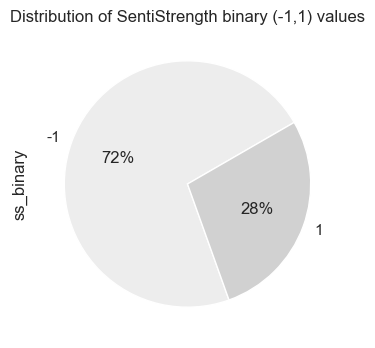

In [26]:
plt.figure(figsize=(4,4))
sns.set(style='white', palette='Greys', font_scale=1.0)

df['ss_binary'].value_counts().plot(kind='pie', 
                                          figsize=(4, 4),
                                          autopct='%1.0f%%',
                                          startangle=30, 
                                          title='Distribution of SentiStrength binary (-1,1) values')

# count values of each label type
df['ss_binary'].value_counts()

-1    4941
 0     895
 1     793
Name: ss_trinary, dtype: int64

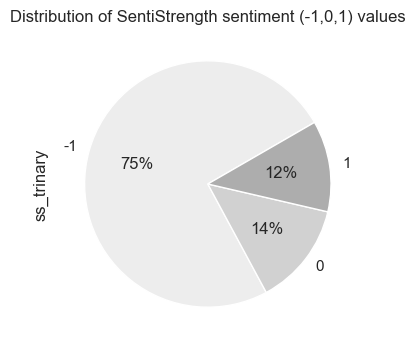

In [27]:
plt.figure(figsize=(4,4))
sns.set(style='white', palette='Greys', font_scale=1.0)

df['ss_trinary'].value_counts().plot(kind='pie', 
                                          figsize=(4, 4),
                                          autopct='%1.0f%%',
                                          startangle=30, 
                                          title='Distribution of SentiStrength sentiment (-1,0,1) values')

# count values of each label type
df['ss_trinary'].value_counts()

-4    3077
 0    1126
-1     593
-2     534
-3     506
 1     368
 3     206
 2     159
 4      60
Name: ss_scale, dtype: int64

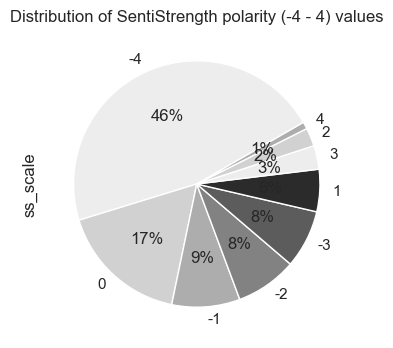

In [28]:
plt.figure(figsize=(4,4))
sns.set(style='white', palette='Greys', font_scale=1.0)

df['ss_scale'].value_counts().plot(kind='pie', 
                                          figsize=(4, 4),
                                          autopct='%1.0f%%',
                                          startangle=30, 
                                          title='Distribution of SentiStrength polarity (-4 - 4) values')

# count values of each label type
df['ss_scale'].value_counts()

## Results analysis for binary sentiment values

In [29]:
# change sentiment values to binary
df['sent_binary'] = df['sentiment']
df['sent_binary'] = df['sent_binary'].replace(0, 1)
df['sent_binary'] = df['sent_binary'].replace(1, 1)
df['sent_binary'] = df['sent_binary'].replace(-1, -1)
df.head(50)

id                                             sample  sentiment  \
0    1   - Ajatus siit√§ ett√§ kaikki henkil√∂n tienaamat...         -1   
1    2   - Kaivovertauksessa, viime hallitus on kaivan...         -1   
2    3                                     --¬¥973¬¥¬§-.ttu          -1   
3    4                                    -=>Widdu joo<=-         -1   
4    5  - Ei , mutta olen joutunut el√§m√§√§n katsomalla ...         -1   
5    6                                       - ei viddu -         -1   
6    7                                     - Huvittunut -          1   
7    8  - Hyv√§ ett√§ JOKU n√§kee uuden , tyhm√§n veroperu...         -1   
8    9  - Kukaan luterilainen ei korota itse√§√§n h√§nen ...         -1   
9   10                               - kuten on sovittu -          0   
10  11                   - Onko koulussanne kiusaamista ?          0   
11  12  - Tarpeeksi vihainen mies tappaa nyrkill√§ kius...         -1   
12  13   -toisen lapsi , lapset jos toinen ei pid√§ nii...         -1   
13  14   Viel√§k√§√§n en tied√§, ett√§ pelleilik√∂ h√§n kanss...         -1   
14  15                           - vittutieteen tohtori -         -1   
15  16  - √Ñl√§ tota yht√§ usko , se lukee palstoja kuin ...         -1   
16  17                        ¬†‚ÄùK√§risty helvetin tulessa‚Äù         -1   
17  18  ! Jos mies vastaavasti pukee itsens√§ niin , et...         -1   
18  19  !! ! mopar on paska paikka jossa on noobit hom...         -1   
19  20                                             !!vttu          0   
20  21                                   !"#!"#¬§111vittu!         -1   
21  22                               !"#¬§!"#¬§111!!!vittu!         -1   
22  23                                !"#¬§%!!"#¬§111vittu!         -1   
23  24                                     !#WDGVIDDU(=)=         -1   
24  25                               !0v sitten sovittuja         -1   
25  26                                       !huvittunut!          1   
26  27                                             !Viddu          0   
27  28                                            !VITTU!         -1   
28  29  " .. mutta Jumala ei hyv√§ksy sit√§ , ettei kunn...         -1   
29  30  " ei heill√§k√§√§n kaikki voi olla kunnossa jos t...          0   
30  31  " El√§m√§ni suurin munaus oli munieni suurin el√§...         -1   
31  32  " En ole nuoruuteni aikana n√§hnyt ainuttakaan ...         -1   
32  33  " En usko , ett√§ olisit niin tyhm√§ , ettek√∂ ym...         -1   
33  34  " Esimerkiksi tappaa ei saa , koska se on v√§√§r...          0   
34  35  " ihanaa jeesus ihanaa " kommentti ei hirve√§st...         -1   
35  36                               " Ime is√§si KYRP√Ñ√Ñ .         -1   
36  37  " Joko olet minun yst√§v√§ tai olet minua vastaa...         -1   
37  38  " Joku voi uskoa ett√§ kunto ei kest√§ armeijass...         -1   
38  39  " Jos haluatte miehet yht√§ ihanan kokemuksen k...         -1   
39  40  " jotkut jaksavat jauhaa jostain vitun " jotku...         -1   
40  41  " j√§rjestyksenvalvoja" vai vaan pelkk√§ h√§iri√∂n...         -1   
41  42  " Kauanko itse jaksaisit keskustella asiallise...          0   
42  43  " Kultainen noutajakin olisi aivan ihana luont...          0   
43  44  " kuuntele poka edes joskus esim. Stevie Ray V...         -1   
44  45  " Lasta ei pid√§ j√§tt√§√§ yksin , kerroitko sin√§ ...          0   
45  46  " Mielest√§ni nuo viestisi henkiv√§t omatekoisen...          0   
46  47  " Mikset sin√§kin ottaisi vastaan Timo Jutilaa ...          1   
47  48  " Miksi sin√§ haluat raiskata √§itini , mit√§ pah...          0   
48  49  " Milloin asteroidi on muuten pamahtanut maaha...         -1   
49  50  " Min√§ saatan olla eliitin huora mutta on mahd...          0   

    polarity  HSbinary  HSstrength   HStarget  \
0         -1         0           0        NaN   
1         -2         0           0        NaN   
2         -5         1           2       NONE   
3         -4         1           2       NONE   
4      

In [30]:
# count values of each label type
df['sent_binary'].value_counts()

-1    5336
 1    1293
Name: sent_binary, dtype: int64

In [31]:
# count values of each label type
df['ss_binary'].value_counts()

-1    4782
 1    1847
Name: ss_binary, dtype: int64

In [32]:
# create panda dataframe for results
df_ss_binary_results = pd.DataFrame({'sample':df['sample'], 'sentiment':df['sent_binary'], 'prediction':df['ss_binary']})
df_ss_binary_results

sample  sentiment  prediction
0      - Ajatus siit√§ ett√§ kaikki henkil√∂n tienaamat...         -1          -1
1      - Kaivovertauksessa, viime hallitus on kaivan...         -1          -1
2                                        --¬¥973¬¥¬§-.ttu          -1          -1
3                                       -=>Widdu joo<=-         -1          -1
4     - Ei , mutta olen joutunut el√§m√§√§n katsomalla ...         -1          -1
...                                                 ...        ...         ...
6624                                     üòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇ          1           1
6625                                              üò†üëâüë©‚Äçüíº         -1           1
6626                                         ü§£ü§£ü§£ü§£ü§£ü§£ü§£ü§£ü§£ü§£          1           1
6627                                                 ü§Æüò°         -1           1
6628                                                 ü¶ãüíú          1           1

[6629 rows x 3 columns]

In [33]:
df_ss_binary_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6629 entries, 0 to 6628
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sample      6629 non-null   object
 1   sentiment   6629 non-null   int64 
 2   prediction  6629 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 155.5+ KB


In [34]:
sentiments = df_ss_binary_results['sentiment'].tolist()
predictions = df_ss_binary_results['prediction'].tolist()

In [35]:
from sklearn.metrics import confusion_matrix, classification_report

class_names = ['negative', 'positive']

print(classification_report(sentiments, predictions, target_names=class_names, zero_division=0))

              precision    recall  f1-score   support

    negative       0.92      0.83      0.87      5336
    positive       0.50      0.71      0.58      1293

    accuracy                           0.80      6629
   macro avg       0.71      0.77      0.73      6629
weighted avg       0.84      0.80      0.81      6629



In [36]:
print(confusion_matrix(sentiments, predictions))

[[4406  930]
 [ 376  917]]


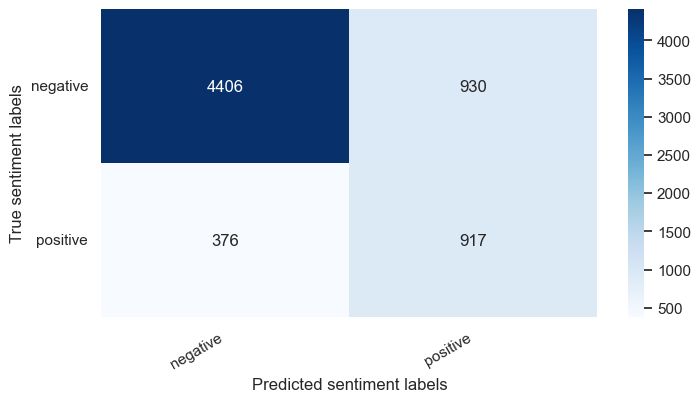

In [37]:
def show_confusion_matrix(confusion_matrix):
    hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
    hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
    hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
    plt.ylabel('True sentiment labels')
    plt.xlabel('Predicted sentiment labels');

cm = confusion_matrix(sentiments, predictions)
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
show_confusion_matrix(df_cm)

In [38]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# calculate accuracy
total_accuracy = accuracy_score(sentiments, predictions, normalize=True, sample_weight=None)
print('Accuracy  ', total_accuracy)

# calculate f1
total_f1 = f1_score(sentiments, predictions, average='weighted', labels=np.unique(predictions), zero_division=0)
print('F1  ', total_f1)

# calculate precision
total_precision = precision_score(sentiments, predictions, average='weighted', labels=np.unique(predictions), zero_division=0)
print('Precision  ', total_precision)

# calculate recall
total_recall = recall_score(sentiments, predictions, average='weighted', labels=np.unique(predictions), zero_division=0)
print('Recall  ', total_recall)

Accuracy   0.8029868758485442
F1   0.8149730771997055
Precision   0.838495946801714
Recall   0.8029868758485442


In [39]:
from pycm import ConfusionMatrix
cm = ConfusionMatrix(actual_vector=sentiments, predict_vector=predictions)
cm.classes

[-1, 1]

In [40]:
cm.stat(summary=True)

Overall Statistics : 

ACC Macro                                                         0.80299
F1 Macro                                                          0.7275
FPR Macro                                                         0.23254
Kappa                                                             0.46021
NPV Macro                                                         0.70893
Overall ACC                                                       0.80299
PPV Macro                                                         0.70893
SOA1(Landis & Koch)                                               Moderate
TPR Macro                                                         0.76746
Zero-one Loss                                                     1306

Class Statistics :

Classes                                                           -1            1             
ACC(Accuracy)                                                     0.80299       0.80299       
AUC(Area under the ROC curve)

## Results analysis for trinary sentiment values

In [41]:
# create panda dataframe for results
df_ss_trinary_results = pd.DataFrame({'sample':df['sample'], 'sentiment':df['sentiment'], 'prediction':df['ss_trinary']})
df_ss_trinary_results

sample  sentiment  prediction
0      - Ajatus siit√§ ett√§ kaikki henkil√∂n tienaamat...         -1          -1
1      - Kaivovertauksessa, viime hallitus on kaivan...         -1          -1
2                                        --¬¥973¬¥¬§-.ttu          -1          -1
3                                       -=>Widdu joo<=-         -1          -1
4     - Ei , mutta olen joutunut el√§m√§√§n katsomalla ...         -1          -1
...                                                 ...        ...         ...
6624                                     üòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇ          1           0
6625                                              üò†üëâüë©‚Äçüíº         -1           0
6626                                         ü§£ü§£ü§£ü§£ü§£ü§£ü§£ü§£ü§£ü§£          1           0
6627                                                 ü§Æüò°         -1           0
6628                                                 ü¶ãüíú          1           0

[6629 rows x 3 columns]

In [42]:
df_ss_trinary_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6629 entries, 0 to 6628
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sample      6629 non-null   object
 1   sentiment   6629 non-null   int64 
 2   prediction  6629 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 155.5+ KB


In [43]:
sentiments = df_ss_trinary_results['sentiment'].tolist()
predictions = df_ss_trinary_results['prediction'].tolist()

In [44]:
from sklearn.metrics import confusion_matrix, classification_report

class_names = ['negative', 'neutral', 'positive']

print(classification_report(sentiments, predictions, target_names=class_names, zero_division=0))

              precision    recall  f1-score   support

    negative       0.91      0.85      0.88      5336
     neutral       0.21      0.30      0.25       639
    positive       0.55      0.67      0.61       654

    accuracy                           0.78      6629
   macro avg       0.56      0.61      0.58      6629
weighted avg       0.81      0.78      0.79      6629



In [45]:
print(confusion_matrix(sentiments, predictions))

[[4514  605  217]
 [ 309  192  138]
 [ 118   98  438]]


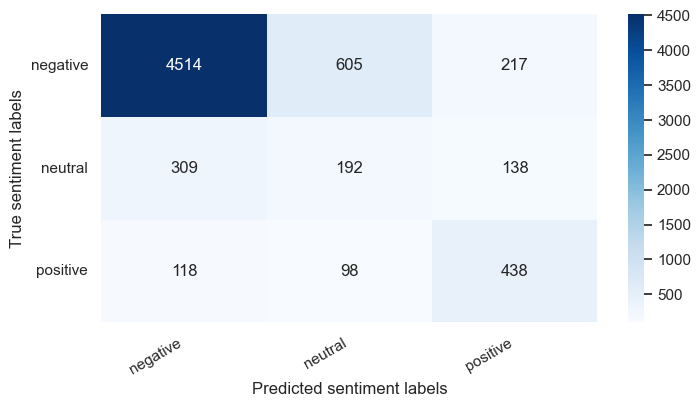

In [46]:
def show_confusion_matrix(confusion_matrix):
    hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
    hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
    hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
    plt.ylabel('True sentiment labels')
    plt.xlabel('Predicted sentiment labels');

cm = confusion_matrix(sentiments, predictions)
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
show_confusion_matrix(df_cm)

In [47]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# calculate accuracy
total_accuracy = accuracy_score(sentiments, predictions, normalize=True, sample_weight=None)
print('Accuracy  ', total_accuracy)

# calculate f1
total_f1 = f1_score(sentiments, predictions, average='weighted', labels=np.unique(predictions), zero_division=0)
print('F1  ', total_f1)

# calculate precision
total_precision = precision_score(sentiments, predictions, average='weighted', labels=np.unique(predictions), zero_division=0)
print('Precision  ', total_precision)

# calculate recall
total_recall = recall_score(sentiments, predictions, average='weighted', labels=np.unique(predictions), zero_division=0)
print('Recall  ', total_recall)

Accuracy   0.7759843113591793
F1   0.7909761308404369
Precision   0.8105553608193169
Recall   0.7759843113591793


In [48]:
from pycm import ConfusionMatrix
cm = ConfusionMatrix(actual_vector=sentiments, predict_vector=predictions)
cm.classes

[-1, 0, 1]

In [49]:
cm.stat(summary=True)

Overall Statistics : 

ACC Macro                                                         0.85066
F1 Macro                                                          0.57806
FPR Macro                                                         0.16901
Kappa                                                             0.40295
NPV Macro                                                         0.79936
Overall ACC                                                       0.77598
PPV Macro                                                         0.56015
SOA1(Landis & Koch)                                               Moderate
TPR Macro                                                         0.60538
Zero-one Loss                                                     1485

Class Statistics :

Classes                                                           -1            0             1             
ACC(Accuracy)                                                     0.81159       0.82652       0.91386       


## Results analysis - for polarity values

In [50]:
df

id                                             sample  sentiment  \
0        1   - Ajatus siit√§ ett√§ kaikki henkil√∂n tienaamat...         -1   
1        2   - Kaivovertauksessa, viime hallitus on kaivan...         -1   
2        3                                     --¬¥973¬¥¬§-.ttu          -1   
3        4                                    -=>Widdu joo<=-         -1   
4        5  - Ei , mutta olen joutunut el√§m√§√§n katsomalla ...         -1   
...    ...                                                ...        ...   
6624  6625                                     üòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇ          1   
6625  6626                                              üò†üëâüë©‚Äçüíº         -1   
6626  6627                                         ü§£ü§£ü§£ü§£ü§£ü§£ü§£ü§£ü§£ü§£          1   
6627  6628                                                 ü§Æüò°         -1   
6628  6629                                                 ü¶ãüíú          1   

      polarity  HSbinary  HSstrength HStarget   HStopic  \
0           -1         0           0      NaN       NaN   
1           -2         0           0      NaN       NaN   
2           -5         1           2     NONE     OTHER   
3           -4         1           2     NONE  TROLLING   
4           -5         0           0      NaN       NaN   
...        ...       ...         ...      ...       ...   
6624         5         0           0      NaN       NaN   
6625        -3         0           0      NaN       NaN   
6626         5         0           0      NaN       NaN   
6627        -4         0           0      NaN       NaN   
6628         4         0           0      NaN       NaN   

                                    HSform  \
0                                      NaN   
1                                      NaN   
2                    SWEARING,  GRANULATED   
3     JOKE SARCASM,  SWEARING,  GRANULATED   
4                                      NaN   
...                                    ...   
6624                                   NaN   
6625                                   NaN   
6626                                   NaN   
6627                                   NaN   
6628                                   NaN   

                                                emotion  ...  \
0        UNPLEASENT,  ANTICIPATION CRITICAL,  SARCASTIC  ...   
1     NEUTRAL NONE,  UNPLEASENT,  ANTICIPATION CRITICAL  ...   
2                                   CONTEMPT DISRESPECT  ...   
3                                             SARCASTIC  ...   
4                                        SADNESS,  FEAR  ...   
...                                                 ...  ...   
6624                                                JOY  ...   
6625                                         ANGER HATE  ...   
6626                                                JOY  ...   
6627                               DISGUST,  ANGER HATE  ...   
6628                                    JOY,  HAPPINESS  ...   

                                           sampleLemmas  \
0       - ajatus se ett√§ kaikki henkil√∂ tienata tulo...   
1       - kaivovertaus , viime hallitus olla kaivaa ...   
2                                         --¬¥973¬¥¬§-.ttu   
3                                      -=>Widdu joo<= -   
4     - ei , mutta olla joutua el√§√§ katsoa kuinka ki...   
...                                                 ...   
6624                        üòÇ üòÇ üòÇ üòÇ üòÇ üòÇ üòÇ üòÇ üòÇ üòÇ üòÇ üòÇ üòÇ üòÇ   
6625                                          üò† üëâ üë© ‚Äç üíº   
6626                                ü§£ ü§£ ü§£ ü§£ ü§£ ü§£ ü§£ ü§£ ü§£ ü§£   
6627                                                ü§Æ üò°   
6628                                                ü¶ã üíú   

                                          correctLemmas  \
0       - ajatus se ett√§ kaikki henkil√∂ tienata tulo...   
1       - kaivovertaus 

In [51]:
# change sentiment values
df['polarity'] = df['polarity'].replace(-5, -4)
df['polarity'] = df['polarity'].replace(5, 4)
df

id                                             sample  sentiment  \
0        1   - Ajatus siit√§ ett√§ kaikki henkil√∂n tienaamat...         -1   
1        2   - Kaivovertauksessa, viime hallitus on kaivan...         -1   
2        3                                     --¬¥973¬¥¬§-.ttu          -1   
3        4                                    -=>Widdu joo<=-         -1   
4        5  - Ei , mutta olen joutunut el√§m√§√§n katsomalla ...         -1   
...    ...                                                ...        ...   
6624  6625                                     üòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇ          1   
6625  6626                                              üò†üëâüë©‚Äçüíº         -1   
6626  6627                                         ü§£ü§£ü§£ü§£ü§£ü§£ü§£ü§£ü§£ü§£          1   
6627  6628                                                 ü§Æüò°         -1   
6628  6629                                                 ü¶ãüíú          1   

      polarity  HSbinary  HSstrength HStarget   HStopic  \
0           -1         0           0      NaN       NaN   
1           -2         0           0      NaN       NaN   
2           -4         1           2     NONE     OTHER   
3           -4         1           2     NONE  TROLLING   
4           -4         0           0      NaN       NaN   
...        ...       ...         ...      ...       ...   
6624         4         0           0      NaN       NaN   
6625        -3         0           0      NaN       NaN   
6626         4         0           0      NaN       NaN   
6627        -4         0           0      NaN       NaN   
6628         4         0           0      NaN       NaN   

                                    HSform  \
0                                      NaN   
1                                      NaN   
2                    SWEARING,  GRANULATED   
3     JOKE SARCASM,  SWEARING,  GRANULATED   
4                                      NaN   
...                                    ...   
6624                                   NaN   
6625                                   NaN   
6626                                   NaN   
6627                                   NaN   
6628                                   NaN   

                                                emotion  ...  \
0        UNPLEASENT,  ANTICIPATION CRITICAL,  SARCASTIC  ...   
1     NEUTRAL NONE,  UNPLEASENT,  ANTICIPATION CRITICAL  ...   
2                                   CONTEMPT DISRESPECT  ...   
3                                             SARCASTIC  ...   
4                                        SADNESS,  FEAR  ...   
...                                                 ...  ...   
6624                                                JOY  ...   
6625                                         ANGER HATE  ...   
6626                                                JOY  ...   
6627                               DISGUST,  ANGER HATE  ...   
6628                                    JOY,  HAPPINESS  ...   

                                           sampleLemmas  \
0       - ajatus se ett√§ kaikki henkil√∂ tienata tulo...   
1       - kaivovertaus , viime hallitus olla kaivaa ...   
2                                         --¬¥973¬¥¬§-.ttu   
3                                      -=>Widdu joo<= -   
4     - ei , mutta olla joutua el√§√§ katsoa kuinka ki...   
...                                                 ...   
6624                        üòÇ üòÇ üòÇ üòÇ üòÇ üòÇ üòÇ üòÇ üòÇ üòÇ üòÇ üòÇ üòÇ üòÇ   
6625                                          üò† üëâ üë© ‚Äç üíº   
6626                                ü§£ ü§£ ü§£ ü§£ ü§£ ü§£ ü§£ ü§£ ü§£ ü§£   
6627                                                ü§Æ üò°   
6628                                                ü¶ã üíú   

                                          correctLemmas  \
0       - ajatus se ett√§ kaikki henkil√∂ tienata tulo...   
1       - kaivovertaus 

In [52]:
# create panda dataframe for results
df_polarity_results = pd.DataFrame({'sample':df['sample'], 'polarity':df['polarity'], 'prediction':df['ss_scale']})
df_polarity_results

sample  polarity  prediction
0      - Ajatus siit√§ ett√§ kaikki henkil√∂n tienaamat...        -1           0
1      - Kaivovertauksessa, viime hallitus on kaivan...        -2          -2
2                                        --¬¥973¬¥¬§-.ttu         -4          -4
3                                       -=>Widdu joo<=-        -4          -3
4     - Ei , mutta olen joutunut el√§m√§√§n katsomalla ...        -4          -1
...                                                 ...       ...         ...
6624                                     üòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇüòÇ         4           0
6625                                              üò†üëâüë©‚Äçüíº        -3           0
6626                                         ü§£ü§£ü§£ü§£ü§£ü§£ü§£ü§£ü§£ü§£         4           0
6627                                                 ü§Æüò°        -4           0
6628                                                 ü¶ãüíú         4           0

[6629 rows x 3 columns]

In [53]:
sentiments = df_polarity_results['polarity'].tolist()
predictions = df_polarity_results['prediction'].tolist()

In [54]:
# count values of each label type
df['polarity'].value_counts()

-4    3948
-3     797
 0     565
-2     431
 4     303
-1     218
 3     137
 2     135
 1      95
Name: polarity, dtype: int64

In [55]:
# count values of each label type
df['ss_scale'].value_counts()

-4    3077
 0    1126
-1     593
-2     534
-3     506
 1     368
 3     206
 2     159
 4      60
Name: ss_scale, dtype: int64

In [56]:
from sklearn.metrics import confusion_matrix, classification_report

class_names = ['-4', '-3', '-2', '-1', '0', '1', '2', '3', '4']

print(classification_report(sentiments, predictions, target_names=class_names, zero_division=0))

              precision    recall  f1-score   support

          -4       0.86      0.67      0.75      3948
          -3       0.17      0.11      0.13       797
          -2       0.12      0.15      0.13       431
          -1       0.07      0.18      0.10       218
           0       0.20      0.41      0.27       565
           1       0.09      0.36      0.15        95
           2       0.10      0.12      0.11       135
           3       0.12      0.18      0.15       137
           4       0.67      0.13      0.22       303

    accuracy                           0.48      6629
   macro avg       0.27      0.26      0.22      6629
weighted avg       0.59      0.48      0.51      6629



In [57]:
print(confusion_matrix(sentiments, predictions))

[[2632  301  279  260  395   61   16    4    0]
 [ 267   87   93  107  188   37   11    6    1]
 [  97   37   63   71  116   32    9    5    1]
 [  22   30   27   39   67   20    5    7    1]
 [  41   36   56   78  229   69   36   17    3]
 [   1    3    4    5   25   34   11   11    1]
 [   1    4    5   14   29   38   16   23    5]
 [   8    5    4   10   34   25   18   25    8]
 [   8    3    3    9   43   52   37  108   40]]


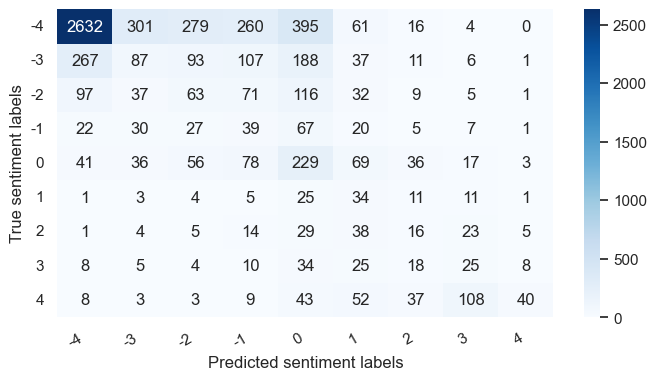

In [58]:
def show_confusion_matrix(confusion_matrix):
    hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
    hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
    hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
    plt.ylabel('True sentiment labels')
    plt.xlabel('Predicted sentiment labels');

cm = confusion_matrix(sentiments, predictions)
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
show_confusion_matrix(df_cm)

In [59]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# calculate accuracy
total_accuracy = accuracy_score(sentiments, predictions, normalize=True, sample_weight=None)
print('Accuracy  ', total_accuracy)

# calculate f1
total_f1 = f1_score(sentiments, predictions, average='weighted', labels=np.unique(predictions), zero_division=0)
print('F1  ', total_f1)

# calculate precision
total_precision = precision_score(sentiments, predictions, average='weighted', labels=np.unique(predictions), zero_division=0)
print('Precision  ', total_precision)

# calculate recall
total_recall = recall_score(sentiments, predictions, average='weighted', labels=np.unique(predictions), zero_division=0)
print('Recall  ', total_recall)

Accuracy   0.4774475788203349
F1   0.5144704370528294
Precision   0.5936263382750187
Recall   0.4774475788203349


In [60]:
from pycm import ConfusionMatrix
cm = ConfusionMatrix(actual_vector=sentiments, predict_vector=predictions)
cm.classes

[-4, -3, -2, -1, 0, 1, 2, 3, 4]

In [61]:
cm.stat(summary=True)

Overall Statistics : 

ACC Macro                                                         0.88388
F1 Macro                                                          0.22248
FPR Macro                                                         0.07248
Kappa                                                             0.242
NPV Macro                                                         0.91965
Overall ACC                                                       0.47745
PPV Macro                                                         0.26616
SOA1(Landis & Koch)                                               Fair
TPR Macro                                                         0.25523
Zero-one Loss                                                     3464

Class Statistics :

Classes                                                           -4            -3            -2            -1            0             1             2             3             4             
ACC(Accuracy)                  